In [1]:
# import sys
# sys.path.insert(0, '../../src')

import quik_ai as qa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from importlib.metadata import version 
print('Quik-AI Version: %s' % version('quik_ai'))

Quik-AI Version: 1.3.1


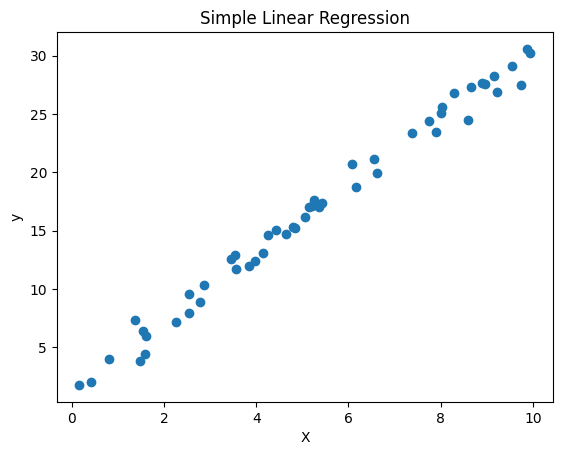

In [2]:
# creating a simple dataset
# X is the independent variable and y is the dependent variable
n = 50
data = pd.DataFrame({
    'X' : np.random.uniform(0, 10, n)
})
data['y'] = data.X * 3 + 1 + np.random.normal(0, 1, size=n)

plt.scatter(data.X, data.y, color = 'C0')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# create the driver, this will generate the tensorflow dataset and feed data
driver = qa.Driver(data, data, data, 'adam', batch_size=5)

# what does our response look like?
head = qa.heads.Regression(non_linear_projection=False)

# all the predictors for the model
predictors = [
    qa.predictors.Numerical('X'),
]

# what is our model architecture? This will store
# our model, driver, and any other information we use in training
# testing, saving, and loading needed for this problem
model = qa.models.ResNet('y', head, predictors, driver, model_dim=20, blocks=0, activation='relu', dropout=0, projection_scale=1)

# train the model, we can provide a hyperparameter tuner and other
# training parameters, by default we will use a custom BOHB tuner
model.train()

Checking for hyper-parameters to tune ...
No hyperparameters found
INFO:tensorflow:Oracle triggered exit
Round 1 best score: 0.7939


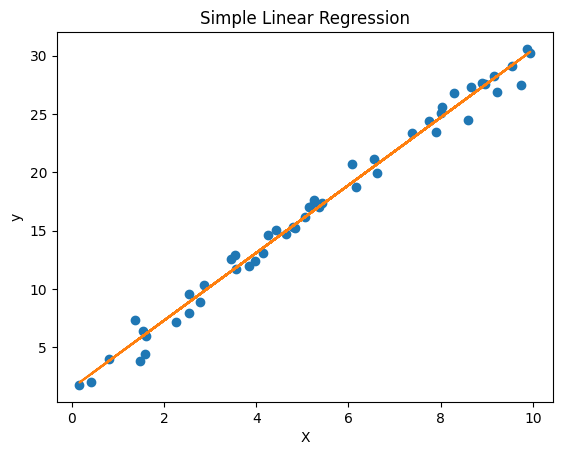

In [4]:
# predicting y
y_pred = model.predict(data, verbose=0)

# Visualising the Training set results
plt.scatter(data.X, data.y, color = 'C0')
plt.plot(data.X, y_pred, color = 'C1')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Checking for hyper-parameters to tune ...
No hyperparameters found
INFO:tensorflow:Oracle triggered exit
Round 1 best score: 26.7039


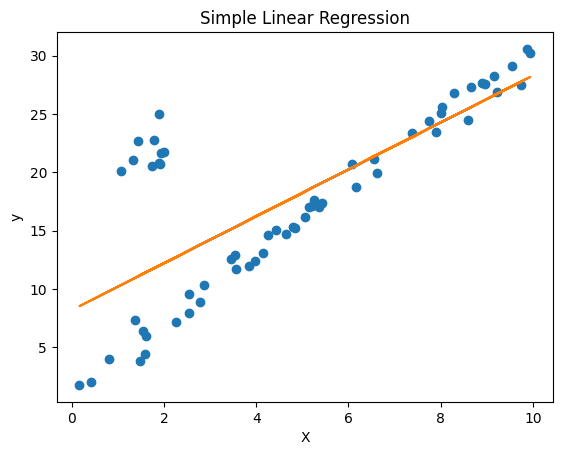

In [5]:
# add some outliers
n_o = 10
outliers = pd.DataFrame({
    'X' : np.random.uniform(1, 2, n_o),
    'y' : np.random.uniform(20, 25, n_o),
})

# append to data
data = pd.concat([data, outliers], ignore_index=True)

# create the driver
driver = qa.Driver(data, data, data, 'adam', batch_size=5)

# recreate the model
model = qa.models.ResNet('y', head, predictors, driver, model_dim=20, blocks=0, activation='relu', dropout=0, projection_scale=1)

# train the model again
model.train()

# predicting y
y_pred = model.predict(data, verbose=0)

# Visualising the Training set results
plt.scatter(data.X, data.y, color = 'C0')
plt.plot(data.X, y_pred, color = 'C1')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Checking for hyper-parameters to tune ...
No hyperparameters found
INFO:tensorflow:Oracle triggered exit
Round 1 best score: 0.9551


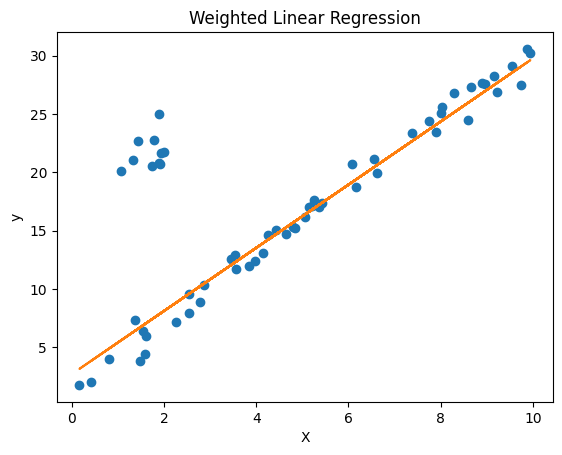

In [6]:
# append to data
data['w'] = [1] * n + [0] * n_o

# create the driver
driver = qa.Driver(data, data, data, 'adam', batch_size=5, weights_column='w')

# recreate the model
model = qa.models.ResNet('y', head, predictors, driver, model_dim=20, blocks=0, activation='relu', dropout=0, projection_scale=1)

# train the model again
model.train()

# predicting y
y_pred = model.predict(data, verbose=0)

# Visualising the Training set results
plt.scatter(data.X, data.y, color = 'C0')
plt.plot(data.X, y_pred, color = 'C1')
plt.title('Weighted Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()